<a href="https://colab.research.google.com/github/shruthi112/Early-Cataract-Detection/blob/master/FIT_ONE_CYCLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#%cd /content/gdrive/My Drive/training
#!pwd


# Create path

In [0]:
path = Path('/content/gdrive/My Drive/training')  
#dest = path/folder
#dest.mkdir(parents = True, exist_ok = True)

# Clean up a bit

In [0]:
classes=['cataract','non-cataract']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

cataract


non-cataract


# View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct = 0.2, ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

In [0]:
data.classes

['cataract', 'non-cataract']

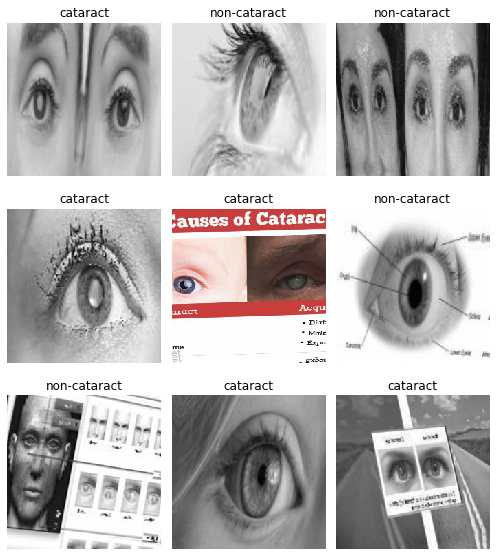

In [0]:
data.show_batch(rows = 3, figsize = (7,8))

In [0]:
data.classes, data.c , len(data.train_ds), len(data.valid_ds)

(['cataract', 'non-cataract'], 2, 291, 72)

# Model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 252MB/s]


In [0]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,1.214031,0.777641,0.694444,00:03
1,1.027570,0.891678,0.722222,00:03
2,0.889202,0.781828,0.708333,00:03
3,0.782723,0.673498,0.708333,00:03
4,0.728875,0.668224,0.763889,00:03
5,0.671112,0.632182,0.736111,00:03


In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.449423,0.622273,0.722222,00:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


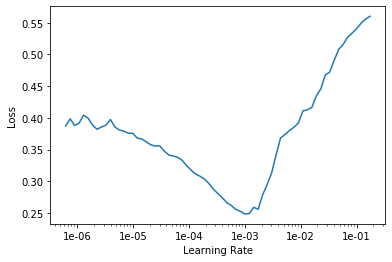

In [0]:
learn.recorder.plot()

# Choose rates

In [0]:
learn.fit_one_cycle(2, max_lr = slice(3e-5,2e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.367193,0.561707,0.763889,00:03
1,0.364832,0.568012,0.750000,00:03


In [0]:
learn.save('stage-2')

# Performance

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (291 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cataract,cataract,cataract,cataract,cataract
Path: /content/gdrive/My Drive/training;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
non-cataract,cataract,cataract,non-cataract,cataract
Path: /content/gdrive/My Drive/training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

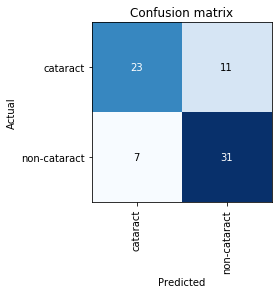

In [0]:
interp.plot_confusion_matrix()

# Predict for new image

In [0]:
classes = ['cataract','non-cataract']

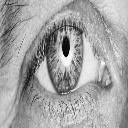

In [0]:
img = open_image(path/'non-cataract'/'shrisha.jpg');img

In [0]:
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/training;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, t

In [0]:
pred_class, pred_idx, outputs = learn.predict(img); pred_class

Category cataract